<a href="https://colab.research.google.com/github/minalang/study/blob/main/210730_kyobo_21%EB%85%84_30%EB%8C%80_bookintro_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [16]:
import pandas as pd
df=pd.read_csv('21_40.CSV', index_col=0, encoding='cp949')
df.head(10)

,책소개,Unnamed: 2
도서명,,
추리 천재 엉덩이 탐정 6 - 수상한 탐정 사무소 사건,초등 저.중학년 수준에 딱 맞는 추리 난이도를 설정하여 어린이 독자들이 자신의 추리...,69821
흔한남매,‘흔한남매’ 유튜브 영상의 스토리를 앙증맞고 유머러스한 만화로 풀어낸 코믹북이다. ...,28665
흔한남매,‘흔한남매’ 유튜브 영상의 스토리를 앙증맞고 유머러스한 만화로 풀어낸 코믹북이다. ...,30673
설민석의 한국사 대모험,국민 역사 강사 설민석의 첫 한국사 학습 만화로 한국사 지식을 기본적으로 다루고 있...,84080
추리 천재 엉덩이 탐정,입으로 뀌는 ‘방귀’로 사건을 해결하는 반전 매력의 주인공 ‘추리 천재 엉덩이 탐정...,96473
어떻게 말해줘야 할까 오은영의 현실밀착 육아회화,‘국민 육아멘토’ ‘대한민국 엄마·아빠들의 엄마’ 오은영 박사의 신간. 누구나 쉽게...,12425
설민석의 한국사 대모험 14 - 명의 허준 편 안녕 로빈!,우리 아이의 ‘지덕체’를 책임질 첫 역사책!대한민국 어린이들의 한국사 길라잡이 『설...,17020
추리 천재 엉덩이 탐정,일본에서 큰 사랑을 받고 있는 아이큐 1104의 추리 천재 ‘엉덩이 탐정’이 주인공...,98528
흔한남매,‘흔한남매’ 유튜브 영상의 스토리를 앙증맞고 유머러스한 만화로 풀어 낸 코믹북이다....,12511


In [ ]:
df.shape

(833, 1)

In [36]:
ft=open('./sample_data/21_40_data.txt', 'wt', encoding='UTF-8')
for i in df.책소개:
    ft.write(str(i))
    ft.write('\n')
    
ft.close()

In [38]:

import re

fr=open('./sample_data/21_40_data.txt', 'r', encoding='UTF-8')
title_word=fr.read()
#print(title_word)

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
# 한국어에서 불용어제거하기
# (직접 정의한 불용어 사전을 참고하여 제거하기)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = "수준에 있다 다양한 통해 과학 한자를"
# 위의 불용어에는 직접 정의한 불용어가 있다.

stop_words=stop_words.split(' ')
word_tokens = word_tokenize(title_word)

result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]

print(word_tokens)
print(result)

['초등', '저.중학년', '수준에', '딱', '맞는', '추리', '난이도를', '설정하여', '어린이', '독자들이', '자신의', '추리력을', '시험해', '볼', '수', '있도록', '기발한', '사건들을', '다뤘다', '.', '추리', '천재', '엉덩이', '탐정과', '열정', '넘치는', '조수', '브라운이', '수상한', '냄새를', '풍기는', '낯선', '탐정', '‘', '캐롯', '말스', '’', '의', '정체를', '파헤치는', '흥미진진한', '이야기다', '.', '‘', '흔한남매', '’', '유튜브', '영상의', '스토리를', '앙증맞고', '유머러스한', '만화로', '풀어낸', '코믹북이다', '.', '하루도', '조용할', '날이', '없는', '으뜸이와', '에이미의', '일상', '스토리는', '진짜', '웃음이', '필요한', '어린이들에게', '순수한', '웃음과', '유쾌한', '우애를', '선사한다', '.', '‘', '흔한남매', '’', '유튜브', '영상의', '스토리를', '앙증맞고', '유머러스한', '만화로', '풀어낸', '코믹북이다', '.', '하루도', '조용할', '날이', '없는', '으뜸이와', '에이미의', '일상', '스토리는', '진짜', '웃음이', '필요한', '어린이들에게', '순수한', '웃음과', '유쾌한', '우애를', '선사한다', '.', '국민', '역사', '강사', '설민석의', '첫', '한국사', '학습', '만화로', '한국사', '지식을', '기본적으로', '다루고', '있다', '.', '설민석', '선생님과', '태건', '역사', '연구소가', '철저하게', '고증하여', '정확한', '역사', '지식을', '어린이들에게', '전달하려고', '노력했다', '.', '입으로', '뀌는', '‘', '방귀', '’', '로', '사건을', '해결하는', '반전', '매력의', '주인공', '‘', '추리', '천재', '엉덩이', '

In [ ]:
# 데이터 전처리 함수
def preprocessing( data, remove_stopwords = False ): 
    # 불용어 제거는 옵션으로 선택 가능하다.
    
    # 1. HTML 태그 제거
    text = BeautifulSoup(data, "html5lib").get_text()	

    # 2. 한글이 아닌 특수문자들을 공백(" ")으로 바꾸기
    text = re.sub("[^ㄱ-힣]", " ", text)

    # 3. 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = text.split()

    if remove_stopwords: 
        # 4. 불용어들을 제거
    
        #영어에 관련된 불용어 불러오기
        #stops = set(stopwords.words("english"))
        
        stopwords = []
        f = open('/content/drive/MyDrive/data/koStop.txt')
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            stopwords.append(line)
        f.close()

        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stopwords]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
        clean_data = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_data = ' '.join(words)

    return clean_data


In [31]:
##########여기서부터###################

'''
title_word=title_word.split(' ')
word_p='+'.join(title_word)

title_word=word_p.split('\n')
word_p='+'.join(title_word)

title_word=word_p.split('+')

find=re.compile('[+]')
find2=re.compile('\n')
#print(find.search(title_word[0]).group())
#print(type(title_word[0]))
    
#for i in title_word:
    #print(i)
#print(title_word)
'''

In [40]:
word_counts={}

for word in result:
    if word not in word_counts:
        word_counts[word]=0
        
    word_counts[word] += 1
    
print(word_counts)

{'초등': 29, '저.중학년': 6, '딱': 11, '맞는': 10, '추리': 33, '난이도를': 7, '설정하여': 7, '어린이': 52, '독자들이': 17, '자신의': 28, '추리력을': 10, '시험해': 10, '볼': 28, '수': 404, '있도록': 93, '기발한': 22, '사건들을': 23, '다뤘다': 7, '.': 2173, '천재': 13, '엉덩이': 12, '탐정과': 11, '열정': 3, '넘치는': 37, '조수': 6, '브라운이': 1, '수상한': 21, '냄새를': 1, '풍기는': 1, '낯선': 13, '탐정': 29, '‘': 254, '캐롯': 1, '말스': 1, '’': 258, '의': 38, '정체를': 4, '파헤치는': 1, '흥미진진한': 80, '이야기다': 17, '흔한남매': 10, '유튜브': 26, '영상의': 7, '스토리를': 12, '앙증맞고': 7, '유머러스한': 7, '만화로': 41, '풀어낸': 5, '코믹북이다': 7, '하루도': 8, '조용할': 7, '날이': 8, '없는': 31, '으뜸이와': 8, '에이미의': 7, '일상': 10, '스토리는': 7, '진짜': 20, '웃음이': 8, '필요한': 13, '어린이들에게': 15, '순수한': 8, '웃음과': 7, '유쾌한': 12, '우애를': 7, '선사한다': 11, '국민': 6, '역사': 29, '강사': 5, '설민석의': 9, '첫': 43, '한국사': 27, '학습': 59, '지식을': 31, '기본적으로': 3, '다루고': 37, '설민석': 6, '선생님과': 4, '태건': 2, '연구소가': 2, '철저하게': 4, '고증하여': 2, '정확한': 2, '전달하려고': 2, '노력했다': 2, '입으로': 4, '뀌는': 3, '방귀': 4, '로': 13, '사건을': 104, '해결하는': 75, '반전': 3, '매력의': 3, '주인공': 26, '과': 10,

In [24]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

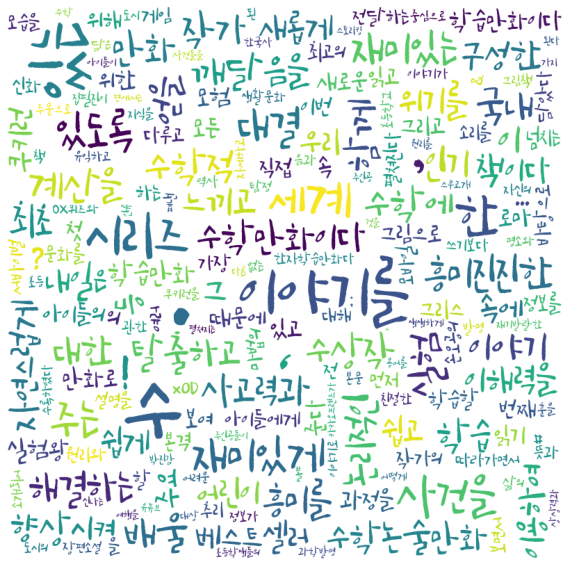

In [41]:
wc=WordCloud(max_font_size=200, font_path='SangSangFlowerRoad.otf',
             background_color='white',
            width=800, height=800).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [42]:
# (/NNG|/NNP|/VA|/VV|/MAG)$
import re
p=re.compile('(/NNG|/NNP|/VA|/VV|/MAG|/NP)$')
title_word_nv=[]

for i in range(0, len(title_word)):
    if (p.search(title_word[i]) != None):
        title_word_nv.append(title_word[i])

#print(title_word_nv)

word_counts_nv={}

for word in title_word_nv:
    if word not in word_counts_nv:
        word_counts_nv[word]=0
        
    word_counts_nv[word] += 1
    
print(word_counts_nv)
len(word_counts_nv)

{}


0

In [43]:
sorted_dict = sorted(word_counts_nv.items(), key = lambda item: item[1], reverse = True)
dict(sorted_dict)

{}

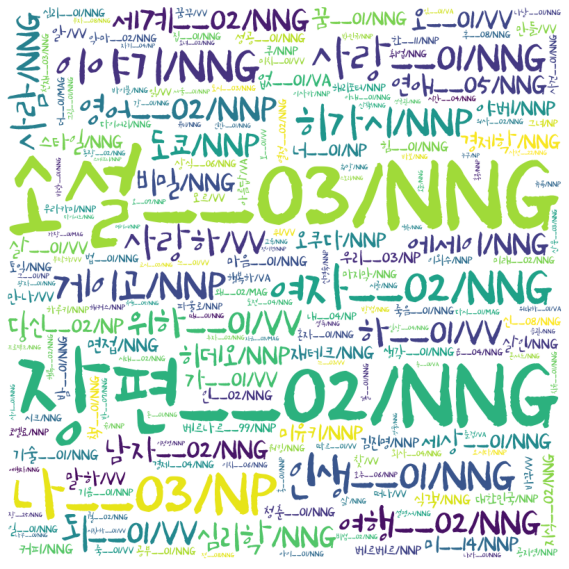

In [ ]:
wc1=WordCloud(max_font_size=200, font_path='/content/drive/My Drive/DataCampus/library/SangSangFlowerRoad.otf',
             background_color='white',
            width=800, height=800).generate_from_frequencies(dict(sorted_dict))
plt.figure(figsize=(10, 8))

plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [ ]:
###############일단 위에까지#####################33
names=[]
count=[]

for i, k in word_counts_nv.items():
    names.append(i)
    count.append(k)

n_c=list(zip(names, count))

df_c_nv=pd.DataFrame(data=n_c, columns=['Word', 'Count'])

df_c_nv.head(10)
df_c_nv.shape

(1769, 2)

In [ ]:
df_c_nv.sort_values(by='Count', ascending=False)[50:100]

,Word,Count
367,프렌즈/NNG,19
1042,로마__02/NNP,18
1041,그리스__02/NNP,18
249,이야기/NNG,18
362,돈__01/NNG,18
1043,신화__04/NNG,18
370,체험/NNG,17
259,인생__01/NNG,17
78,마음__01/NNG,16
415,아빠/NNG,15


In [ ]:
#연어분석
p=re.compile('소설')
title_word_nv=[]

for i in range(0, len(list(df.도서명))):
    if (p.search(list(df.도서명)[i]) != None):
        title_word_nv.append(df.도서명[i])

#print(title_word_nv)

word_counts_nv={}

for word in title_word_nv:
    if word not in word_counts_nv:
        word_counts_nv[word]=0
        
    word_counts_nv[word] += 1

#print(word_counts_nv)


names=[]
count=[]

for i, k in word_counts_nv.items():
    names.append(i)
    count.append(k)
    
#print(names)
#print(count)

n_c=list(zip(names, count))

ngram=pd.DataFrame(data=n_c, columns=['Word', 'Count'])

ngram=ngram.sort_values(by='Count' , ascending = False)
ngram.head(20)

TypeError: ignored

In [ ]:
df.주제분류번호

번호
1           NaN
2           NaN
3         674.2
4         234.1
5         813.7
          ...  
297634      410
297635      410
297636      410
297637      410
297638    711.4
Name: 주제분류번호, Length: 297638, dtype: object

In [ ]:
df.주제분류번호=df.주제분류번호.fillna('None')

In [ ]:
for m in df.주제분류번호:
  print(m)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
351.1704
401
519.24
181.7
325.555
325.211
598.132
199.1
598.122
843
598.132
981.102
004.783
005.53
519.6
235.84
235.84
327.04
011.3
802
818
331.62
327.87
300
235.84
300
911.063099
810.099
911.055
420
429
454
362.111
892.95
843
813.7
813.7
320.1
834
594.71
517.32
818
233.63
813.7
816.7
539.98
676.24
485.16
004.73
327.43
231.16
231.8
300
329.43
329.4
606.91
818
559.34469
373.23
350.7
883
370.23
400
813.6
813.6
813.6
813.6
813.6
392.19
392.19
334.225
808.9
None
670.99
670.99
593.242
511.1813
833.6
325.24
620.9
592.27
592.27
592.27
001.3
926.04
670.15
187.5
813.6
189.1
199.6
818
833.6
747.5
911.0723
569
None
None
164.42
165.4
223.56
327.2
331.5412
327.8
517.52
429
321.97
304
331.1
811.62099
802.1
980.24
013.33
340.18
636
337.099
476.0162
404
327.87
005.565
373.4
818
234.82
818
370.18
802.54
818
233
231.09
233.01
679.312
321.97
365.56
517.36
331.5412
181.71
863
843
892.95
833.6
331.54
350.704
813.7
823.5
237.2
564
740.7
593.5
598.104
598.104
843
843
326.7

KeyboardInterrupt: ignored

In [ ]:
reference_counts={}

for m in df.주제분류번호:
  if m != 'None':
    if m[0] not in reference_counts:
        reference_counts[m[0]]=0
    reference_counts[m[0]] += 1

print(reference_counts)

{'6': 14727, '2': 9019, '8': 99283, '7': 15334, '3': 46325, '4': 18391, '5': 20279, '9': 21821, '1': 13894, '0': 15039}


In [ ]:
df.columns

Index(['도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권', '주제분류번호',
       '도서권수', '대출건수', '등록일자', 'Unnamed: 13'],
      dtype='object')

findfont: Font family ['SangSangFlowerRoad'] not found. Falling back to DejaVu Sans.


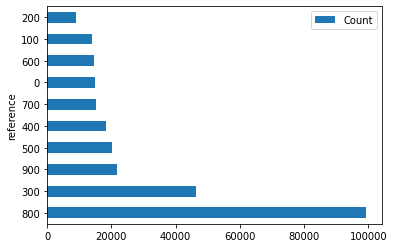

In [ ]:
#한글 깨짐 해결하는 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='/content/drive/My Drive/DataCampus/library/SangSangFlowerRoad.otf').get_name()
rc('font', family=font_name)

names=[]
count=[]

p=re.compile('[0-9]')


for i, k in reference_counts.items():
    if p.match(i) != None:
        names.append(str(int(i)*100))
    else:
        names.append(i)
        
    count.append(k)
    
#print(names)
#print(count)

reference_c=list(zip(names, count))

df_reference=pd.DataFrame(data=reference_c, columns=['reference', 'Count'])

df_reference=df_reference.sort_values(by='Count' , ascending = False)
df_reference.head(20)


df_reference.index=df_reference['reference']
df_reference
df_reference.plot(kind='barh')
